# Fraud Detection Data Preprosessing

## 1. Import libraries and loading dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', 50)

In [3]:
pd.read_csv('~/aiffel/data/fraud.csv')

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
491129,2020-12-31 23:56:48,6011109736646996,fraud_Botsford and Sons,home,134.26,Rebecca,Erickson,F,594 Berry Lights Apt. 392,Wilmington,NC,28405,34.2651,-77.8670,186140,English as a second language teacher,1983-02-08,fc860b0d1f89b0b068c9c8db27b6bcc5,1388534208,34.853497,-78.664158,0
491130,2020-12-31 23:56:57,213112402583773,"fraud_Baumbach, Hodkiewicz and Walsh",shopping_pos,25.49,Ana,Howell,F,4664 Sanchez Common Suite 930,Bradley,SC,29819,34.0326,-82.2027,1523,Research scientist (physical sciences),1984-06-03,0f0c38fe781b317f733b845c0d6ba448,1388534217,35.008839,-81.475156,0
491131,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,TX,77566,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
491132,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,WA,99323,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0


## 2. Understanding dataset

In [4]:
fraud_df = pd.read_csv('~/aiffel/data/fraud.csv')
fraud_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
1,2019-01-01 00:12:34,4956828990005111019,"fraud_Schultz, Simonis and Little",grocery_pos,44.71,Kenneth,Robinson,M,269 Sanchez Rapids,Elizabeth,NJ,7208,40.6747,-74.2239,124967,Operational researcher,1980-12-21,09eff9c806365e2a6be12c1bbab3d70e,1325376754,40.079588,-74.848087,0
2,2019-01-01 00:17:16,180048185037117,fraud_Kling-Grant,grocery_net,46.28,Mary,Wall,F,2481 Mills Lock,Plainfield,NJ,7060,40.6152,-74.4150,71485,Leisure centre manager,1974-07-19,19e23c6a300c774354417befe4f31f8c,1325377036,40.021888,-74.228188,0
3,2019-01-01 00:20:15,374930071163758,fraud_Deckow-O'Conner,grocery_pos,64.09,Daniel,Escobar,M,61390 Hayes Port,Romulus,MI,48174,42.2203,-83.3583,31515,Police officer,1971-11-05,6f363661ba6b55889e488dd178f2a0af,1325377215,42.360426,-83.552316,0
4,2019-01-01 00:23:41,2712209726293386,fraud_Balistreri-Nader,misc_pos,25.58,Jenna,Brooks,F,50872 Alex Plain Suite 088,Baton Rouge,LA,70808,30.4066,-91.1468,378909,"Designer, furniture",1977-02-22,1654da2abfb9e79a5f99167fc9779558,1325377421,29.737426,-90.853194,0


In [5]:
fraud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  491134 non-null  object 
 1   cc_num                 491134 non-null  int64  
 2   merchant               491134 non-null  object 
 3   category               491134 non-null  object 
 4   amt                    491134 non-null  float64
 5   first                  491134 non-null  object 
 6   last                   491134 non-null  object 
 7   gender                 491134 non-null  object 
 8   street                 491134 non-null  object 
 9   city                   491134 non-null  object 
 10  state                  491134 non-null  object 
 11  zip                    491134 non-null  int64  
 12  lat                    491134 non-null  float64
 13  long                   491134 non-null  float64
 14  city_pop               491134 non-nu

## 3. Handling duplicated data

In [6]:
fraud_df[fraud_df.duplicated()]

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud


## 4. Handling missing data

In [7]:
fraud_df.isna().sum()

trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [8]:
fraud_df.isna().mean()

trans_date_trans_time    0.0
cc_num                   0.0
merchant                 0.0
category                 0.0
amt                      0.0
first                    0.0
last                     0.0
gender                   0.0
street                   0.0
city                     0.0
state                    0.0
zip                      0.0
lat                      0.0
long                     0.0
city_pop                 0.0
job                      0.0
dob                      0.0
trans_num                0.0
unix_time                0.0
merch_lat                0.0
merch_long               0.0
is_fraud                 0.0
dtype: float64

## 5. Change data type 'trans_date_trans_time' & 'dob' to  datetime

In [9]:
pd.to_datetime(fraud_df['trans_date_trans_time'])

0        2019-01-01 00:00:44
1        2019-01-01 00:12:34
2        2019-01-01 00:17:16
3        2019-01-01 00:20:15
4        2019-01-01 00:23:41
                 ...        
491129   2020-12-31 23:56:48
491130   2020-12-31 23:56:57
491131   2020-12-31 23:59:09
491132   2020-12-31 23:59:15
491133   2020-12-31 23:59:34
Name: trans_date_trans_time, Length: 491134, dtype: datetime64[ns]

In [10]:
fraud_df['trans_date_trans_time'] = pd.to_datetime(fraud_df['trans_date_trans_time'])

In [11]:
fraud_df['dob'] = pd.to_datetime(fraud_df['dob'])

### Extract 'hour' value from the 'trans_date_trans_time'

In [12]:
fraud_df['trans_date_trans_time'].dt.hour

0          0
1          0
2          0
3          0
4          0
          ..
491129    23
491130    23
491131    23
491132    23
491133    23
Name: trans_date_trans_time, Length: 491134, dtype: int32

In [13]:
fraud_df['hour'] = fraud_df['trans_date_trans_time'].dt.hour

### Extract 'age' from 'dob'

In [14]:
from datetime import datetime

today = datetime.now()
fraud_df['age'] = today.year - fraud_df['dob'].dt.year

## 6. Binning 'amt' data 
[0, 10, 50, 100, 500, 1000, 5000, 10000, 15000, 20000, 25000]

In [15]:
fraud_df['amt'].describe()

count    491134.000000
mean         69.050120
std         160.322867
min           1.000000
25%           8.960000
50%          42.170000
75%          80.330000
max       25086.940000
Name: amt, dtype: float64

In [16]:
bins = [0, 10, 50, 100, 500, 1000, 5000, 10000, 15000, 20000, 25000]
labels = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fraud_df['amt_bin'] = pd.cut(fraud_df['amt'], bins = bins, labels = labels)

<Axes: xlabel='None', ylabel='amt_bin'>

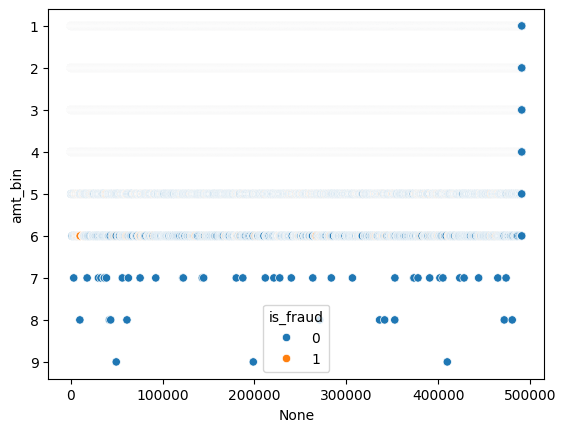

In [17]:
sns.scatterplot(data=fraud_df, x = fraud_df.index, y= 'amt_bin', hue='is_fraud')

## 7. Divide region w/c/e depend on the 'long' column 


<Axes: xlabel='long', ylabel='lat'>

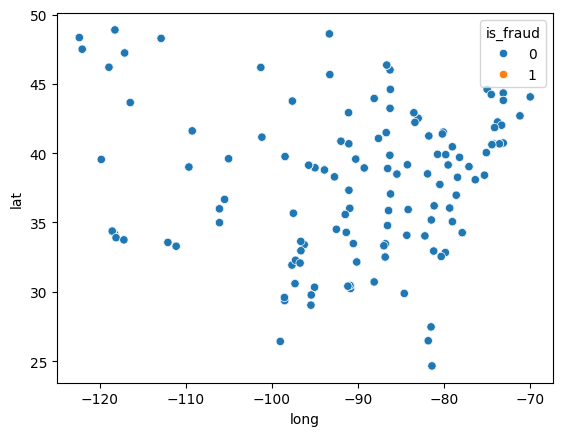

In [ ]:
sns.scatterplot(data=fraud_df, x = 'long', y= 'lat', hue='is_fraud', alpha = 0.1)

In [19]:
def determine_region_ew(longitude):
    if -82 <= longitude <= -66:
        return 'Eastern'
    elif -101 <= longitude < -82:
        return 'Central'
    elif -125 <= longitude < -101:
        return 'Western'
    else:
        return 'Other'
    
fraud_df['east_west'] = fraud_df['long'].apply(determine_region_ew).astype('category')


<Axes: xlabel='long', ylabel='lat'>

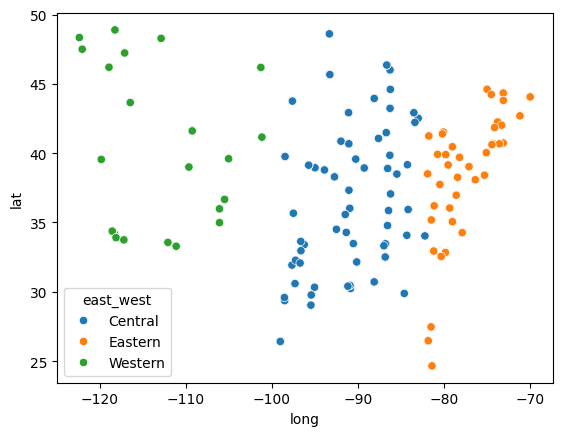

In [20]:
sns.scatterplot(data=fraud_df, x = 'long', y= 'lat', hue='east_west')

In [21]:
fraud_df['east_west'].value_counts()

east_west
Central    245172
Eastern    156957
Western     89005
Name: count, dtype: int64

## 8. Divide region n/c/s depend on the 'lat' column

In [22]:
def determine_region_ns(latitude):
    if 60 > latitude > 40:
        return 'Northern'
    elif 40 >= latitude > 35:
        return 'Central'
    elif 35 >= latitude > 20:
        return 'Southern'
    else:
        return 'Other'
    
fraud_df['north_south'] = fraud_df['lat'].apply(determine_region_ns).astype('category')

<Axes: xlabel='long', ylabel='lat'>

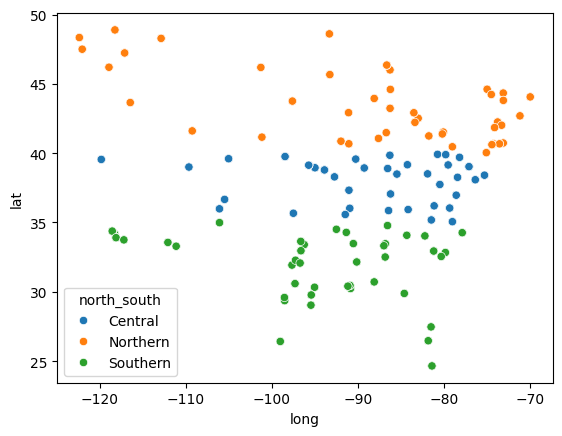

In [23]:
sns.scatterplot(data=fraud_df, x = 'long', y= 'lat', hue='north_south')

In [24]:
fraud_df['north_south'].value_counts()

north_south
Northern    177374
Southern    165595
Central     148165
Name: count, dtype: int64

## 9 Eliminate unnecessary columns

In [25]:
fraud_df2 = fraud_df.drop(['trans_date_trans_time', 'cc_num', 'merchant', 'amt', 'first', 'last', 'city', 'street', 'state', 'zip', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time', 'lat', 'long', 'merch_lat', 'merch_long'], axis = 1)

In [26]:
fraud_df2.columns

Index(['category', 'gender', 'is_fraud', 'hour', 'age', 'amt_bin', 'east_west',
       'north_south'],
      dtype='object')

In [27]:
fraud_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   category     491134 non-null  object  
 1   gender       491134 non-null  object  
 2   is_fraud     491134 non-null  int64   
 3   hour         491134 non-null  int32   
 4   age          491134 non-null  int32   
 5   amt_bin      491133 non-null  category
 6   east_west    491134 non-null  category
 7   north_south  491134 non-null  category
dtypes: category(3), int32(2), int64(1), object(2)
memory usage: 16.4+ MB


In [28]:
fraud_df2.head()

,category,gender,is_fraud,hour,age,amt_bin,east_west,north_south
0,grocery_pos,F,0,0,46,4,Western,Northern
1,grocery_pos,M,0,0,44,2,Eastern,Northern
2,grocery_net,F,0,0,50,2,Eastern,Northern
3,grocery_pos,M,0,0,53,3,Central,Northern
4,misc_pos,F,0,0,47,2,Central,Southern


## 10. Change datatype object to category for 'category' and 'gender' column

In [29]:
fraud_df2['category'] = fraud_df2['category'].astype('category')

In [30]:
fraud_df2['gender'] = fraud_df2['gender'].astype('category')

In [31]:
fraud_df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   category     491134 non-null  category
 1   gender       491134 non-null  category
 2   is_fraud     491134 non-null  int64   
 3   hour         491134 non-null  int32   
 4   age          491134 non-null  int32   
 5   amt_bin      491133 non-null  category
 6   east_west    491134 non-null  category
 7   north_south  491134 non-null  category
dtypes: category(5), int32(2), int64(1)
memory usage: 9.8 MB


## 11. One-Hot encoding & Correlation analysis

In [32]:
fraud_df2_encoded = pd.get_dummies(fraud_df2)
fraud_df2_encoded.corr()


,is_fraud,hour,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel,gender_F,gender_M,amt_bin_1,amt_bin_2,amt_bin_3,amt_bin_4,amt_bin_5,amt_bin_6,amt_bin_7,amt_bin_8,amt_bin_9,amt_bin_10,east_west_Central,east_west_Eastern,east_west_Western,north_south_Central,north_south_Northern,north_south_Southern
is_fraud,1.000000,-0.020113,-0.004231,-0.005158,-0.004529,-0.002167,-0.010054,0.015494,-0.006551,-0.005395,-0.005028,0.008306,-0.004094,-0.004997,0.021344,0.001570,-0.002040,-0.004024,0.004024,-0.023378,-0.009424,-0.029914,0.017423,0.180129,0.112603,-0.000431,-0.000227,-0.000125,NaN,0.001539,0.000560,-0.002675,0.002710,0.000399,-0.003037
hour,-0.020113,1.000000,-0.050627,0.142345,0.146952,-0.432770,-0.308063,-0.392184,0.137790,0.164066,0.156823,-0.165836,-0.008393,0.148008,0.152760,0.173476,0.084870,-0.015438,0.015438,0.239308,0.054638,-0.246978,-0.067703,0.013391,0.022330,0.005144,0.002590,0.000595,NaN,0.011227,-0.006171,-0.007103,-0.000303,0.002378,-0.002121
age,-0.004231,-0.050627,1.000000,-0.027086,-0.022047,-0.046536,0.000799,0.053279,-0.015142,0.048195,0.014348,-0.017461,-0.006095,0.003463,0.003302,0.009496,-0.013913,0.167083,-0.167083,-0.040967,0.013162,0.001359,0.027725,0.015110,0.004075,-0.003381,-0.001561,-0.000873,NaN,-0.114820,0.008620,0.138602,-0.066764,-0.008361,0.073317
category_entertainment,-0.005158,0.142345,-0.027086,1.000000,-0.076215,-0.087171,-0.062095,-0.083671,-0.070862,-0.084333,-0.081041,-0.063014,-0.072054,-0.075680,-0.079812,-0.089571,-0.044024,-0.024584,0.024584,-0.091719,0.033297,0.015020,0.058347,-0.017505,-0.015267,-0.002321,-0.001223,-0.000670,NaN,0.004379,-0.001625,-0.003717,-0.000530,0.002206,-0.001727
category_food_dining,-0.004529,0.146952,-0.022047,-0.076215,1.000000,-0.090414,-0.064404,-0.086784,-0.073498,-0.087470,-0.084056,-0.065358,-0.074735,-0.078495,-0.082781,-0.092903,-0.045662,-0.016105,0.016105,0.037372,0.047103,-0.038514,-0.048173,-0.022265,-0.015835,-0.002407,-0.001269,-0.000695,NaN,0.006782,-0.003628,-0.004411,0.001168,-0.000525,-0.000601
category_gas_transport,-0.002167,-0.432770,-0.046536,-0.087171,-0.090414,1.000000,-0.073663,-0.099259,-0.084063,-0.100044,-0.096139,-0.074754,-0.085478,-0.089779,-0.094681,-0.106258,-0.052226,-0.033648,0.033648,-0.199202,-0.048797,0.371685,-0.130703,-0.026968,-0.018112,-0.002753,-0.001451,-0.000795,NaN,0.010249,-0.002487,-0.010293,0.020868,0.016618,-0.037146
category_grocery_net,-0.010054,-0.308063,0.000799,-0.062095,-0.064404,-0.073663,1.000000,-0.070705,-0.059881,-0.071264,-0.068482,-0.053249,-0.060888,-0.063952,-0.067444,-0.075691,-0.037202,-0.006037,0.006037,-0.135106,0.109296,0.107772,-0.088939,-0.019210,-0.012901,-0.001961,-0.001034,-0.000566,NaN,-0.001428,0.001861,-0.000399,-0.004910,-0.005943,0.010806
category_grocery_pos,0.015494,-0.392184,0.053279,-0.083671,-0.086784,-0.099259,-0.070705,1.000000,-0.080688,-0.096027,-0.092279,-0.071752,-0.082046,-0.086175,-0.090880,-0.101992,-0.050129,0.008812,-0.008812,-0.191892,-0.124358,0.070956,0.302136,-0.025885,-0.017384,-0.002643,-0.001393,-0.000763,NaN,-0.012870,0.005622,0.009899,-0.002304,-0.002980,0.005265
category_health_fitness,-0.006551,0.137790,-0.015142,-0.070862,-0.073498,-0.084063,-0.059881,-0.080688,1.000000,-0.081326,-0.078151,-0.060767,-0.069485,-0.072982,-0.076966,-0.086377,-0.042454,-0.012697,0.012697,-0.077741,0.095739,-0.002276,-0.011594,-0.021523,-0.014723,-0.002238,-0.001180,-0.000646,NaN,0.004589,-0.000368,-0.005511,-0.000857,0.000648,0.000173
category_home,-0.005395,0.164066,0.048195,-0.084333,-0.087470,-0.100044,-0.071264,-0.096027,-0.081326,1.000000,-0.093008,-0.072319,-0.082694,-0.086855,-0.091598,-0.102798,-0.050525,0.006882,-0.006882,-0.103054,0.116372,0.004647,-0.012679,-0.025918,-0.017522,-0.002664,-0.001404,-0.000769,NaN,-0.009506,0.0045

<Axes: title={'center': 'Pearson Correlation of Features'}>

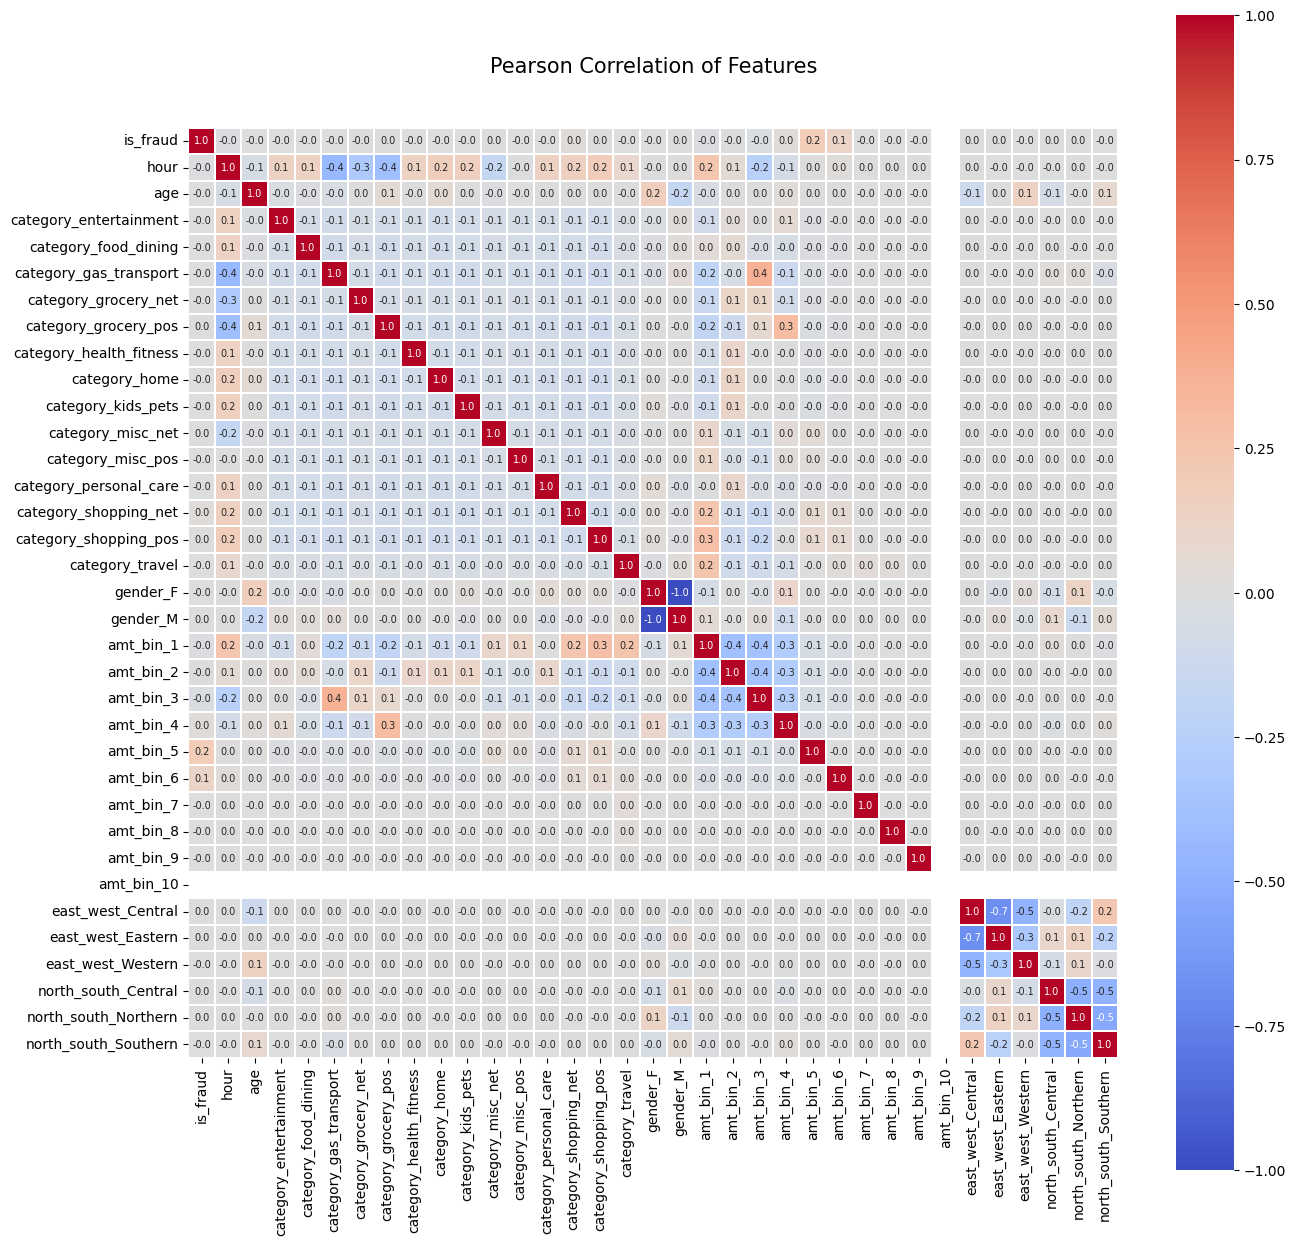

In [33]:
colormap = plt.cm.coolwarm
plt.figure(figsize=(15, 15))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(fraud_df2_encoded.astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={'size': 7}, fmt='.1f')

## 12. Model

In [34]:
fraud_df2_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491134 entries, 0 to 491133
Data columns (total 35 columns):
 #   Column                   Non-Null Count   Dtype
---  ------                   --------------   -----
 0   is_fraud                 491134 non-null  int64
 1   hour                     491134 non-null  int32
 2   age                      491134 non-null  int32
 3   category_entertainment   491134 non-null  bool 
 4   category_food_dining     491134 non-null  bool 
 5   category_gas_transport   491134 non-null  bool 
 6   category_grocery_net     491134 non-null  bool 
 7   category_grocery_pos     491134 non-null  bool 
 8   category_health_fitness  491134 non-null  bool 
 9   category_home            491134 non-null  bool 
 10  category_kids_pets       491134 non-null  bool 
 11  category_misc_net        491134 non-null  bool 
 12  category_misc_pos        491134 non-null  bool 
 13  category_personal_care   491134 non-null  bool 
 14  category_shopping_net    491134 non-

In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [36]:
# Split data into train and test set
X_train_df = fraud_df2_encoded.drop('is_fraud', axis=1).values
target_label = fraud_df2_encoded['is_fraud'].values

In [37]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X_train_df, target_label, test_size=0.3, random_state=2024)

In [45]:
# Train model (Random Forest Regression)
model = RandomForestClassifier(n_estimators=500, random_state=0)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, random_state=0)

In [46]:
# Predict test set
y_pred = model.predict(X_test)

In [48]:
# Calculate model performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# 결과를 출력합니다.
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9979706938326739
Precision: 0.6697674418604651
Recall: 0.3870967741935484
F1 Score: 0.4906303236797275
Confusion Matrix:
 [[146898     71]
 [   228    144]]


In [49]:
from sklearn.model_selection import GridSearchCV

# Reset model
model = RandomForestClassifier(random_state=0)

# Define hyperparameter options
param_grid = {
    'n_estimators': [100, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Turning hyperparameter with GridSearchCV.
CV_rfc = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)
CV_rfc.fit(X_train, y_train)

# Print the optimum hyperparameter.
print(CV_rfc.best_params_)